<a href="https://colab.research.google.com/github/tfranke0814/pytorch-deep-learning/blob/main/02_pytorch_classification_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

08:40:32 - https://www.youtube.com/watch?v=LyJtbe__2i0&t=8h40m32s

# 02. NN classification with PyTorch

Classifications is predicting whether one thing is something or another. (Muchas opciones)

## 1. Make classification data and get ready

In [2]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [4]:
# Make a DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [5]:
circles["label"].value_counts()

,count
label,
1,500
0,500


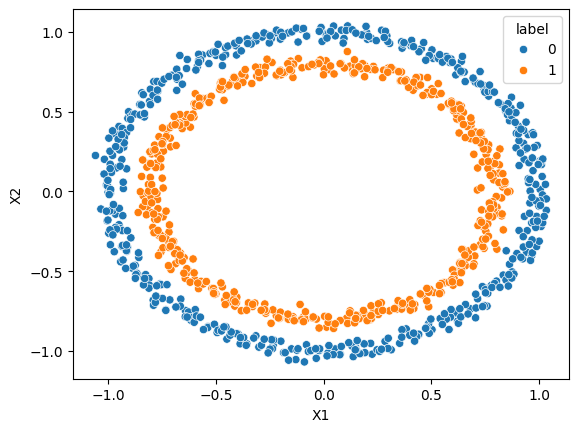

In [6]:
# Visualize!!!!!
import seaborn as sns
sns.scatterplot(x="X1",
                y="X2",
                hue="label",
                data=circles);

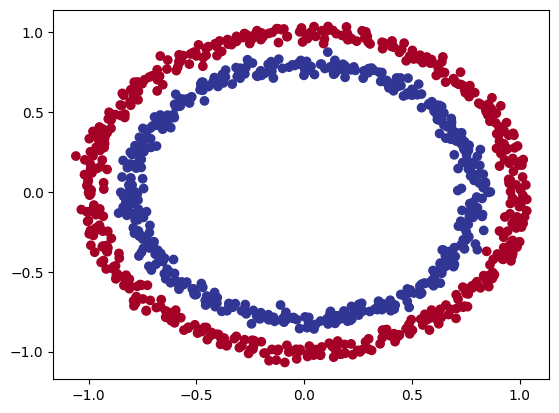

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

### 1.1 Check input and output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# View the 1st example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Sample input features: {X_sample} -> type: {X_sample.dtype}, shape: {X_sample.shape}")
print(f"Sample label: {y_sample} -> type: {y_sample.dtype}, shape: {y_sample.shape}")

Sample input features: [0.75424625 0.23148074] -> type: float64, shape: (2,)
Sample label: 1 -> type: int64, shape: ()


### 1.2 Turn data into tensors and create train and test splits

In [10]:
import torch
torch.__version__

'2.6.0+cu124'

In [11]:
X = torch.from_numpy(X).type(torch.float) if not torch.is_tensor(X) else X.type(torch.float)
y = torch.from_numpy(y).type(torch.float) if not torch.is_tensor(y) else y.type(torch.float)
X[:5], X.dtype,  y[:5], y.dtype

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 torch.float32,
 tensor([1., 1., 1., 1., 0.]),
 torch.float32)

In [12]:
# Split data into training into test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

1. Setup device agnostic code
2. Construct the model (subclass `nn.Module`)
3. Define a loss function and an optimizer
4. Train and test loop

In [13]:
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [14]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,
                                 out_features=5)
        self.layer_2 = nn.Linear(in_features=5,
                                 out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_2(self.layer_1(x))

torch.manual_seed(42)
model_0 = CircleModelV0().to(device) # Create an instance of the model
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('layer_2.bias', tensor([-0.2060]))])

In [15]:
# Let's replicate hte above using `nn.Sequential`
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0, model_0.state_dict()

(Sequential(
   (0): Linear(in_features=2, out_features=5, bias=True)
   (1): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('0.weight',
               tensor([[-0.0829, -0.2872],
                       [ 0.4691, -0.5582],
                       [-0.3260, -0.1997],
                       [-0.4252,  0.0667],
                       [-0.6984,  0.6386]])),
              ('0.bias',
               tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
              ('1.weight',
               tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
              ('1.bias', tensor([-0.1213]))]))

In [16]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)} | Shape of predictions: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)} | Shape of test samples: {y_test.shape}")
print(f"First 10 predictions: {untrained_preds[:10]}")
print(f"First 10 test samples: {y_test[:10]}")

Length of predictions: 200 | Shape of predictions: torch.Size([200, 1])
Length of test samples: 200 | Shape of test samples: torch.Size([200])
First 10 predictions: tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]])
First 10 test samples: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should we use?

Again... this is problem specific.

In [17]:
loss_fn = nn.BCELoss() # Requires inputs have already gone through the sigmoid function

# Similar to `nn.Sequential(nn.Sigmoid(), nn.BCELoss())` --\/
loss_fn = nn.BCEWithLogitsLoss() # Has the sigmoid activation function built-in
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [18]:
# Calculate Accuracy - Out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## 3. Training the model

Training loop time!!!!! - https://www.youtube.com/watch?v=Nutpusq_AFw

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Can convert the **logits** into prediction probabilities by using the `torch.sigmoid()` function (or some other activation function).

Can convert the prediction probabilities to **prediction labels** by rounding them or taking the `argmax()`.

In [19]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [20]:
# Use the sigmoid function on out model logits to get prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

In [21]:
y_preds = torch.round(y_pred_probs)

In [22]:
model_0.eval()
with torch.inference_mode():
  # Logits -> to pred probs -> pred labels
  y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze(), y_pred_labels.squeeze()

tensor([True, True, True, True, True])


(tensor([0., 0., 1., 0., 1.]), tensor([0., 0., 1., 0., 1.]))

In [23]:
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

tensor([True, True, True, True, True])


### 3.2 Building a training and testing loop

My loop on my own, before continuing with the video

In [24]:
epochs = 1000
y_train = torch.reshape(y_train.to(device), (len(y_train), 1))
y_test = torch.reshape(y_test.unsqueeze(dim=1).to(device), (len(y_test), 1))
X_train, X_test = X_train.to(device), X_test.to(device)

epoch_count = []
loss_values = []
test_loss_values = []
train_acc = []
test_acc = []

# For epoch in range
for epoch in range(epochs):
  # Call model.train()
  model_0.train()

  # Do the forward pass
  y_preds = model_0(X_train) ######## This is wrong, well technically right
  # Calculate the loss
  loss = loss_fn(y_preds, y_train) # with loss, but label is bad
  # Optimizer Zero Grad
  optimizer.zero_grad()
  # Losssss Backwards
  loss.backward()
  # Optimizer Step... Step... Step
  optimizer.step()

  # Let's Test!
  # Call model.eval()
  model_0.eval()
  # with torch inference mode
  with torch.inference_mode():
    # Do the forward pass
    test_preds = model_0(X_test)
    # Calculate the loss
    test_loss = loss_fn(test_preds, y_test)
  # Print out what's happenin'
  if epoch % 10 == 0:
    # Accuracy
    train_acc.append(accuracy_fn(y_train, torch.round(torch.sigmoid(model_0(X_train)))))
    test_acc.append(accuracy_fn(y_test, torch.round(torch.sigmoid(model_0(X_test)))))
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss} | Train Acc: {train_acc[-1]} | Test Acc: {test_acc[-1]}")

Epoch: 0 | Loss: 0.6979604959487915 | Test Loss: 0.6943961977958679 | Train Acc: 51.87500000000001 | Test Acc: 57.99999999999999
Epoch: 10 | Loss: 0.6958984136581421 | Test Loss: 0.6930528283119202 | Train Acc: 51.125 | Test Acc: 53.0
Epoch: 20 | Loss: 0.6949015855789185 | Test Loss: 0.692543625831604 | Train Acc: 51.625 | Test Acc: 49.5
Epoch: 30 | Loss: 0.6943498253822327 | Test Loss: 0.6923599243164062 | Train Acc: 51.125 | Test Acc: 49.5
Epoch: 40 | Loss: 0.6940091848373413 | Test Loss: 0.6923156976699829 | Train Acc: 50.875 | Test Acc: 51.0
Epoch: 50 | Loss: 0.6937822103500366 | Test Loss: 0.6923369765281677 | Train Acc: 50.5 | Test Acc: 50.0
Epoch: 60 | Loss: 0.6936231255531311 | Test Loss: 0.6923913359642029 | Train Acc: 50.24999999999999 | Test Acc: 51.5
Epoch: 70 | Loss: 0.6935078501701355 | Test Loss: 0.6924623847007751 | Train Acc: 50.375 | Test Acc: 51.0
Epoch: 80 | Loss: 0.693422257900238 | Test Loss: 0.6925414800643921 | Train Acc: 49.75 | Test Acc: 50.0
Epoch: 90 | Loss:

Continuing with the video!!

In [25]:
torch.manual_seed(42)

epochs = 100

X_train, y_train, X_test, y_test = X_train.to(device), y_train.squeeze().to(device), X_test.to(device), y_test.squeeze().to(device)

for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # Turn logits -> pred probs -> pred labels
  # 2. Calculate the loss/Accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), ##  nn.BCELoss expects prediction probabilities as inputs
  #                 y_train)
  loss = loss_fn(y_logits, ##  nn.BCEWithLogitsLoss expects raw logits as inputs
                  y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  # Optimizer Zero Grad
  optimizer.zero_grad()
  # Backpropigation
  loss.backward()
  # Gradient Descent Step
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate the loss/Accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
  # Print out what's happenin'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69298 | Accuracy: 51.38% | Test Loss: 0.69461 | Test Accuracy: 45.00%
Epoch: 10 | Loss: 0.69298 | Accuracy: 51.38% | Test Loss: 0.69461 | Test Accuracy: 45.00%
Epoch: 20 | Loss: 0.69298 | Accuracy: 51.50% | Test Loss: 0.69461 | Test Accuracy: 45.00%
Epoch: 30 | Loss: 0.69298 | Accuracy: 51.50% | Test Loss: 0.69462 | Test Accuracy: 45.00%
Epoch: 40 | Loss: 0.69298 | Accuracy: 51.50% | Test Loss: 0.69462 | Test Accuracy: 45.00%
Epoch: 50 | Loss: 0.69298 | Accuracy: 51.38% | Test Loss: 0.69462 | Test Accuracy: 45.00%
Epoch: 60 | Loss: 0.69298 | Accuracy: 51.38% | Test Loss: 0.69462 | Test Accuracy: 45.00%
Epoch: 70 | Loss: 0.69298 | Accuracy: 51.38% | Test Loss: 0.69462 | Test Accuracy: 45.00%
Epoch: 80 | Loss: 0.69298 | Accuracy: 51.38% | Test Loss: 0.69463 | Test Accuracy: 45.00%
Epoch: 90 | Loss: 0.69298 | Accuracy: 51.38% | Test Loss: 0.69463 | Test Accuracy: 45.00%


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything

As they say "Visualize, Visualize, Visualize"

In [27]:
import requests
from pathlib import Path
# Dowload helper functions from Learn PyTorch repo (if it isn't already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/tfranke0814/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

11:05:22 - https://www.youtube.com/watch?v=LyJtbe__2i0&t11h5m22s

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)